## 线性回归

- 正则化框架: $$ L(W) + \lambda P(W)$$

> 其中L为Loss Function, P为penalty(惩罚函数)

- 目标: $\arg\min\limits_{W} [L(W) + \lambda P(W)]$

- 正则化方式

- L1: Lasso : $$P(W) = \lVert W \rVert$$
- L2: Ridge : $$P(W) = \lVert W \rVert^2 = W^TW $$

$$ \begin{align}
\mathcal{J}(W)  =& \sum_{n=1}^N \lVert W^Tx_i - y_i\rVert^2 + \lambda W^TW\\
 =& (W^TX^T-Y^T)(XW-Y) + \lambda W^TW\\
 =& W^TX^TXW-W^TX^T - Y^TXW + Y^TY + \lambda W^TW\\
 =& W^T(X^TX + \lambda I)W- 2W^TX^TY + Y^TY
\end{align}
$$


- 对W求最小, 需要对其求导: $$ \frac {\delta J(W)} {\delta W} = 2(X^TX + \lambda I)W- 2X^TY = 0 $$

- 可得: $$\hat{W} = (X^TX + \lambda I)^{-1}X^TY$$

> 其中X^TX为半正定, 加上 $\lambda I$后必然正定, 即可逆

#### 最大后验估计(MAP)-贝叶斯角度

- 从MAP角度来看, 参数必然服从某个分布, 故假设 $W ~ N(0, \sigma^2_0)$

- 因此, 忽略 $P(y)$ 这个常值的影响, 可得: $$ \hat{W} = \arg\max\limits_{W} P(W|y) = \arg\max\limits_{W} \dfrac{P(y|W)P(W)}{P(y)} = \arg\max\limits_{W} P(y|W)P(W)$$

- 计算具体分布可得: $$ \hat{W} = \sum_{n=1}^N (y_i -  W^Tx_i)^2 \dfrac{\sigma^2}{\sigma^2_0} \lVert W\rVert^2$$

- 观察上式结果, 其与加了Ridge正则化的Loss Function一致, 上面的(1)式子

- 其中 $ \lambda = \dfrac{\sigma^2}{\sigma^2_0}$

> $ \sigma^2_0 = \sigma^2 $ 时, 就相当于 $\sigma^2_0$ 先验估计直接使用了后验的 $\sigma^2$ 的值, 故会使 $\lambda = 1$

### 代码

#### 最小二乘法矩阵硬解

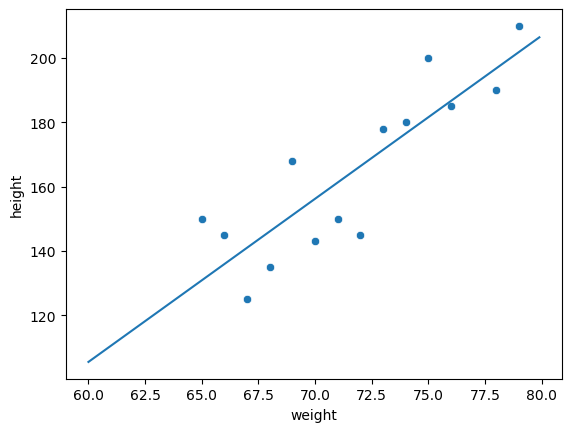

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

gender = 'gender'
weight = 'weight'
height = 'height'

dataUrl = '.\\heightWeightData.csv'

df = pd.read_csv(dataUrl)

# 规整数据
df = df[df[gender] == 1] 
df = df[df[height] < 240]
df = df.loc[:,[weight, height]]
df = df.drop_duplicates(subset=weight)

# X = b + w
X = df[weight].values
X = X.reshape(-1, 1)
B = np.ones((X.shape[0], 1))
Y = df[height].values
X=np.column_stack((B,X))

# 套用参数计算公式
A = np.matmul(X.T, X)
## 加入岭回归的与最小二乘法唯一不相同的一步
A = A + 0.1 * np.eye(len(A))
X = np.matmul(np.matrix(A).I, X.T)
W = np.matmul(X,Y)

# 绘图
xy = pd.DataFrame()
xy['x'] = np.arange(60, 80, 0.1)
xy['y'] = xy['x'].apply(lambda x: x*W[0,1] + W[0,0])
sns.scatterplot(data=df,x= weight, y = height)
sns.lineplot(data=xy, x = 'x', y='y')
plt.show()

#### 最小二乘法代数求解

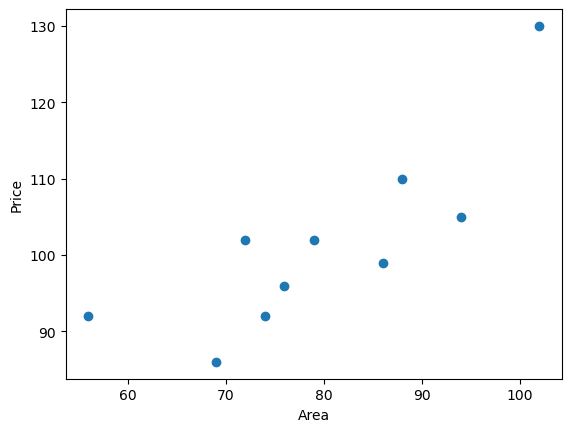

In [3]:
import warnings
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

# 减少代码执行过程中的不必要提醒
warnings.filterwarnings("ignore")
x = np.array([56, 72, 69, 88, 102, 86, 76, 79, 94, 74])
y = np.array([92, 102, 86, 110, 130, 99, 96, 102, 105, 92])
plt.scatter(x, y)
plt.xlabel("Area")
plt.ylabel("Price")

def f(x: list, w0: float, w1: float):
    """一元一次函数表达式"""
    y = w0 + w1 * x
    return y

def square_loss(x: np.ndarray, y: np.ndarray, w0: float, w1: float):
    """平方损失函数"""
    loss = sum(np.square(y - (w0 + w1 * x)))
    return loss

def least_squares_algebraic(x: np.ndarray, y: np.ndarray):
    """最小二乘法代数求解"""
    n = x.shape[0]
    w1 = (n * sum(x * y) - sum(x) * sum(y)) / (n * sum(x * x) - sum(x) * sum(x))
    w0 = (sum(x * x) * sum(y) - sum(x) * sum(x * y)) / (
        n * sum(x * x) - sum(x) * sum(x)
    )
    return w0, w1

In [5]:
params = least_squares_algebraic(x, y)

w0 = params[0]
w1 = params[1]

square_loss(x, y, w0, w1)

447.69153479025357

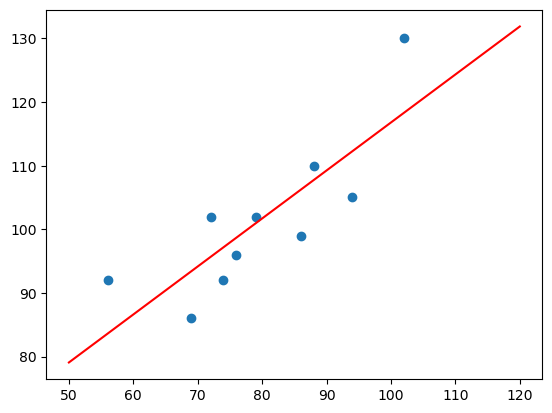

In [6]:
x_temp = np.linspace(50, 120, 100)  # 绘制直线生成的临时点

plt.scatter(x, y)
plt.plot(x_temp, x_temp * w1 + w0, "r")

In [7]:
f(150, w0, w1)

154.5227329816629

#### scikit-learn求解

In [5]:
import warnings
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline
from sklearn.linear_model import LinearRegression


x = np.array([56, 72, 69, 88, 102, 86, 76, 79, 94, 74])
y = np.array([92, 102, 86, 110, 130, 99, 96, 102, 105, 92])
# 定义线性回归模型
model = LinearRegression()
model.fit(x.reshape(x.shape[0], 1), y)  # 训练, reshape 操作把数据处理成 fit 能接受的形状

# 得到模型拟合参数
model.intercept_, model.coef_
model.predict([[150]])

array([154.52273298])

#### 数据集

In [6]:
import pandas as pd

df = pd.read_csv("./course-5-boston.csv")
features = df[["crim", "rm", "lstat"]]
features.describe()


,crim,rm,lstat
count,506.000000,506.000000,506.000000
mean,3.593761,6.284634,12.653063
std,8.596783,0.702617,7.141062
min,0.006320,3.561000,1.730000
25%,0.082045,5.885500,6.950000
50%,0.256510,6.208500,11.360000
75%,3.647423,6.623500,16.955000
max,88.976200,8.780000,37.970000


In [8]:
target = df["medv"]  # 目标值数据

split_num = int(len(features) * 0.7)  # 得到 70% 位置

X_train = features[:split_num]  # 训练集特征
y_train = target[:split_num]  # 训练集目标

X_test = features[split_num:]  # 测试集特征
y_test = target[split_num:]  # 测试集目标

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


model = LinearRegression()  # 建立模型
model.fit(X_train, y_train)  # 训练模型
print(model.coef_, model.intercept_ ) # 输出训练后的模型参数和截距项


preds = model.predict(X_test)  # 输入测试集特征进行预测

# 平均绝对误差（MAE） 也就是绝对误差的平均值
def mae_solver(y_true: np.ndarray, y_pred: np.ndarray):
    """MAE 求解"""
    n = len(y_true)
    mae = sum(np.abs(y_true - y_pred)) / n
    return mae

# 均方误差（MSE）表示误差的平方的期望值
def mse_solver(y_true: np.ndarray, y_pred: np.ndarray):
    """MSE 求解"""
    n = len(y_true)
    mse = sum(np.square(y_true - y_pred)) / n
    return mse

mae = mae_solver(y_test.values, preds)
mse = mse_solver(y_test.values, preds)

print("MAE: ", mae)
print("MSE: ", mse)

(354, 3) (354,) (152, 3) (152,)
[ 0.69979497 10.13564218 -0.20532653] -38.000969889690325
MAE:  13.0220630727803
MSE:  303.8331247223644


#### 岭回归拟合

- 使用希尔伯特矩阵来检测拟合, 数据之间存在相关性
$$
\begin{pmatrix}
                    1 & {\frac{1}{2}} & {\frac{1}{3}} & {\frac{1}{4}} & {\frac{1}{5}} \\
                    {\frac{1}{2}} & {\frac{1}{3}} &{\frac{1}{4}} & {\frac{1}{5}} & {\frac{1}{6}} \\
                    {\frac{1}{3}} & {\frac{1}{4}} & {\frac{1}{5}} & {\frac{1}{6}} & {\frac{1}{7}} \\
                    {\frac{1}{4}} & {\frac{1}{5}} & {\frac{1}{6}} & {\frac{1}{7}} & {\frac{1}{8}} \\
                    {\frac{1}{5}} & {\frac{1}{6}} &{\frac{1}{7}} & {\frac{1}{8}} & {\frac{1}{9}} \\
\end{pmatrix}
$$

In [14]:
from scipy.linalg import hilbert
import numpy as np
import pandas as pd

x = hilbert(10)
pd.DataFrame(x, columns=["x%d" % i for i in range(1, 11)]).corr() # 数据之间的相关性

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10
x1,1.000000,0.985344,0.965392,0.948277,0.934230,0.922665,0.913025,0.904883,0.897921,0.891902
x2,0.985344,1.000000,0.995632,0.988183,0.980720,0.973927,0.967905,0.962598,0.957918,0.953774
x3,0.965392,0.995632,1.000000,0.998160,0.994616,0.990719,0.986928,0.983393,0.980155,0.977207
x4,0.948277,0.988183,0.998160,1.000000,0.999065,0.997120,0.994845,0.992525,0.990281,0.988163
x5,0.934230,0.980720,0.994616,0.999065,1.000000,0.999465,0.998294,0.996860,0.995346,0.993839
x6,0.922665,0.973927,0.990719,0.997120,0.999465,1.000000,0.999669,0.998914,0.997959,0.996922
x7,0.913025,0.967905,0.986928,0.994845,0.998294,0.999669,1.000000,0.999782,0.999271,0.998608
x8,0.904883,0.962598,0.983393,0.992525,0.996860,0.998914,0.999782,1.000000,0.999850,0.999491
x9,0.897921,0.957918,0.980155,0.990281,0.995346,0.997959,0.999271,0.999850,1.000000,0.999893
x10,0.891902,0.953774,0.977207,0.988163,0.993839,0.996922,0.998608,0.999491,0.999893,1.000000


##### 最小二乘法拟合

In [16]:
from scipy.optimize import leastsq

x = hilbert(10)  # 生成 10x10 的希尔伯特矩阵
np.random.seed(10)  # 随机数种子能保证每次生成的随机数一致
w = np.random.randint(2, 10, 10)  # 随机生成 w 系数
y_temp = np.matrix(x) * np.matrix(w).T  # 计算 y 值
y = np.array(y_temp.T)[0]  # 将 y 值转换成 1 维行向量

print("实际参数 w: ", w)
print("实际函数值 y: ", y)

func = lambda p, x: np.dot(x, p)  # 函数公式
err_func = lambda p, x, y: func(p, x) - y  # 残差函数
p_init = np.random.randint(1, 2, 10)  # 全部参数初始化为 1

parameters = leastsq(err_func, p_init, args=(x, y))  # 最小二乘法求解
print("拟合参数 w: ", parameters[0])

实际参数 w:  [3 7 6 9 2 3 5 6 3 7]
实际函数值 y:  [14.14761905 10.1232684   8.12233045  6.8529637   5.95634643  5.28188478
  4.75274309  4.32480306  3.97061256  3.67205737]
拟合参数 w:  [  2.99884806   7.06556011   5.11564728  13.58072171  -7.13665053
   0.41780021  46.08282339 -63.11512431  52.24116589  -6.2515245 ]


##### 岭回归拟合比较

[6.3497497  4.32792068 3.40228975 2.83692059 2.44632895 2.15683095
 1.93213214 1.75189668 1.60369747 1.47944808]


Text(0.5, 1.0, 'Ridge Regression')

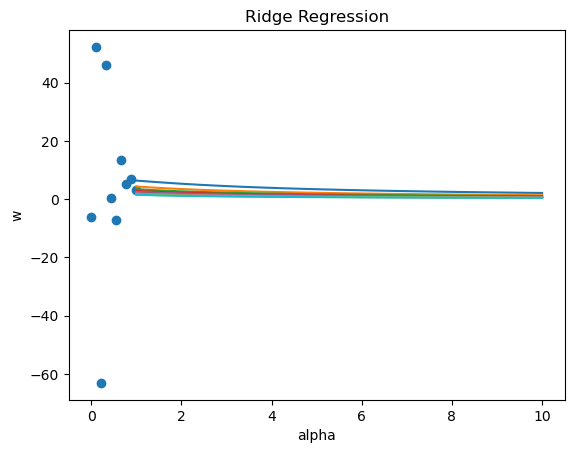

In [19]:
from sklearn.linear_model import Ridge
from matplotlib import pyplot as plt

%matplotlib inline

ridge_model = Ridge(fit_intercept=False)  # 参数代表不增加截距项
ridge_model.fit(x, y)
print(ridge_model.coef_ )


"""不同 alpha 参数拟合
"""
alphas = np.linspace(1, 10, 20)

coefs = []
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(x, y)
    coefs.append(ridge.coef_)

"""绘制不同 alpha 参数结果
"""

plt.plot(alphas, coefs)  # 绘制不同 alpha 参数下的 w 拟合值
plt.scatter(np.linspace(1, 0, 10), parameters[0])  # 普通最小二乘法拟合的 w 值放入图中
plt.xlabel("alpha")
plt.ylabel("w")
plt.title("Ridge Regression")

#### 套索回归

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


Text(0.5, 1.0, 'Lasso Regression')

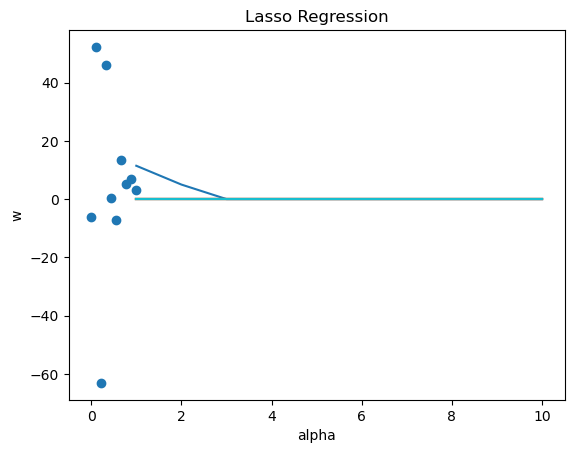

In [21]:
"""使用 LASSO 回归拟合并绘图
"""
from sklearn.linear_model import Lasso

alphas = np.linspace(1, 10, 10)
print(alphas)
lasso_coefs = []

for a in alphas:
    lasso = Lasso(alpha=a, fit_intercept=False)
    lasso.fit(x, y)
    lasso_coefs.append(lasso.coef_)

plt.plot(alphas, lasso_coefs)  # 绘制不同 alpha 参数下的 w 拟合值
plt.scatter(np.linspace(1, 0, 10), parameters[0])  # 普通最小二乘法拟合的 w 值放入图中
plt.xlabel("alpha")
plt.ylabel("w")
plt.title("Lasso Regression")